<a href="https://colab.research.google.com/github/julidoominguez/SeriesdeTiempoAustral/blob/main/TP2_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1u3bkCwaRhj7NY50qnj9rEkMQGqVAcryUiimM_La4lqE/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
df_vitalcer = pd.read_csv(csv_url)

In [ ]:
df_vitalcer['fecha'] = pd.to_datetime(df_vitalcer['fecha'], format='%Y-%m-%d')
df_vitalcer.set_index('fecha', inplace=True)
df_vitalcer = df_vitalcer.sort_index()

In [ ]:
# Resamplea a una frecuencia diaria y llena los días faltantes con 0
df_vitalcer_daily = df_vitalcer.asfreq('D').fillna(0)


In [ ]:
df_vitalcer_daily.head()

,Monto_deflactado,dieta,RH2M
fecha,,,
2019-11-15,595695.0318,62.0,66.94
2019-11-16,460448.3130,60.0,75.19
2019-11-17,0.0000,0.0,0.00
2019-11-18,0.0000,0.0,0.00
2019-11-19,606252.4772,88.0,73.75


In [ ]:
df_vitalcer_daily = df_vitalcer_daily.reset_index()

### Empleo

In [ ]:
import pandas as pd

# URL del archivo CSV
url = "https://infra.datos.gob.ar/catalog/sspm/dataset/158/distribution/158.1/download/remuneracion-imponible-promedio-trabajadores-estables-ripte-total-pais-pesos-serie-mensual.csv"

# Cargar el archivo CSV en un DataFrame
RIPTE = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
RIPTE.head()


,indice_tiempo,ripte
0,1994-07-01,874.87
1,1994-08-01,893.00
2,1994-09-01,907.99
3,1994-10-01,910.75
4,1994-11-01,916.93


In [ ]:
# URL del archivo CSV
url = "https://infra.datos.gob.ar/catalog/sspm/dataset/149/distribution/149.1/download/indice-salarios-periodicidad-mensual-base-octubre-2016.csv"

# Cargar el archivo CSV en un DataFrame
indice_salarios = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
indice_salarios.head()

,indice_tiempo,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,indice_salarios_no_registrado_sector_privado
0,2015-10-01,NaN,74.44,73.97,75.24,NaN
1,2015-11-01,NaN,76.07,75.95,76.28,NaN
2,2015-12-01,NaN,77.29,77.36,77.18,NaN
3,2016-01-01,NaN,78.38,78.93,77.46,NaN
4,2016-02-01,NaN,79.42,80.04,78.36,NaN


In [ ]:
# URL del archivo CSV
url = "https://infra.datos.gob.ar/catalog/sspm/dataset/51/distribution/51.2/download/poblacion-empleada-total-por-aglomerado-urbano-encuesta-indicadores-laborales-trimestrales.csv"

# Cargar el archivo CSV en un DataFrame
indice_empleo = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
indice_empleo.head()

,indice_tiempo,indice_gran_buenos_aires,indice_gran_cordoba,indice_gran_rosario,indice_gran_mendoza
0,1996-01-01,99.631854,NaN,NaN,NaN
1,1996-04-01,100.286447,NaN,NaN,NaN
2,1996-07-01,100.410019,NaN,NaN,NaN
3,1996-10-01,101.458705,NaN,NaN,NaN
4,1997-01-01,102.844707,NaN,NaN,NaN


In [ ]:
RIPTE['indice_tiempo'] = pd.to_datetime(RIPTE['indice_tiempo'], format='%Y-%m-%d')
indice_salarios['indice_tiempo'] = pd.to_datetime(indice_salarios['indice_tiempo'], format='%Y-%m-%d')
indice_empleo['indice_tiempo'] = pd.to_datetime(indice_empleo['indice_tiempo'], format='%Y-%m-%d')


In [ ]:
# Realizar left join sucesivos
df_combined = pd.merge(RIPTE, indice_salarios, on='indice_tiempo', how='left')
df_combined = pd.merge(df_combined, indice_empleo, on='indice_tiempo', how='left')

# Mostrar las primeras filas del DataFrame combinado
df_combined.head()

,indice_tiempo,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,indice_salarios_no_registrado_sector_privado,indice_gran_buenos_aires,indice_gran_cordoba,indice_gran_rosario,indice_gran_mendoza
0,1994-07-01,874.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994-08-01,893.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994-09-01,907.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994-10-01,910.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994-11-01,916.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
start_date = '2019-11-01'
end_date = '2024-12-31'
df_combined_filtered = df_combined[(df_combined['indice_tiempo'] >= start_date) & (df_combined['indice_tiempo'] <= end_date)]

# Mostrar las primeras filas del DataFrame combinado y filtrado
df_combined_filtered.head()

,indice_tiempo,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,indice_salarios_no_registrado_sector_privado,indice_gran_buenos_aires,indice_gran_cordoba,indice_gran_rosario,indice_gran_mendoza
304,2019-11-01,48591.60,233.32,238.57,242.85,231.39,212.21,NaN,NaN,NaN,NaN
305,2019-12-01,49574.33,239.44,243.40,246.54,238.13,223.54,NaN,NaN,NaN,NaN
306,2020-01-01,53070.21,253.78,259.01,267.60,244.59,232.76,128.850009,141.672863,123.859589,122.109942
307,2020-02-01,56386.47,263.55,269.36,279.97,251.57,240.22,NaN,NaN,NaN,NaN
308,2020-03-01,56872.86,271.58,277.31,286.40,262.08,248.53,NaN,NaN,NaN,NaN


In [ ]:
df_combined_filtered = df_combined_filtered.drop(columns=['indice_gran_cordoba', 'indice_gran_rosario', 'indice_gran_mendoza'])

### Comercio

In [ ]:
# URL del archivo CSV
url = "https://infra.datos.gob.ar/catalog/sspm/dataset/11/distribution/11.3/download/emae-apertura-por-sectores-valores-mensuales-indice-base-2004.csv"

# Cargar el archivo CSV en un DataFrame
EMAE= pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
EMAE.head()

,indice_tiempo,agricultura_ganaderia_caza_silvicultura,pesca,explotacion_minas_canteras,industria_manufacturera,electricidad_gas_agua,construccion,comercio_mayorista_minorista_reparaciones,hoteles_restaurantes,transporte_comunicaciones,intermediacion_financiera,actividades_inmobiliarias_empresariales_alquiler,admin_publica_planes_seguridad_social_afiliacion_obligatoria,ensenianza,servicios_sociales_salud,otras_actividades_servicios_comunitarias_sociales_personales,impuestos_netos_subsidios
0,2004-01-01,65.995350,42.547868,100.704499,91.454610,99.917983,95.938047,92.065338,108.411682,95.506726,103.890256,91.418382,97.261268,95.627695,94.198394,97.006178,98.314856
1,2004-02-01,64.926598,62.440771,95.414186,89.424852,92.893440,98.853388,91.464718,103.448256,90.736414,96.481464,94.046978,97.882285,96.084246,90.313462,96.836135,89.730000
2,2004-03-01,110.666559,174.084646,100.251038,101.426433,103.770210,103.124529,109.127780,101.061842,97.175809,98.304568,99.648725,97.718459,96.380304,98.081488,96.155043,99.139119
3,2004-04-01,150.065920,153.877638,96.697547,98.437312,97.009849,95.815492,99.420141,93.242999,99.706933,95.315896,97.602261,98.405542,97.711867,102.184345,98.083137,98.321770
4,2004-05-01,209.388076,132.357664,104.100533,100.353138,102.471825,97.994567,100.532744,90.985260,105.552437,97.004671,99.803493,99.208518,99.136888,102.761265,98.054349,103.825463


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1QADKBhjMIFyl97v51wiO78ANeKDP9Kh01JDAzbfPOAc/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
indice_comercio_minorista = pd.read_csv(csv_url)
indice_comercio_minorista.head()

,Month of Período,Ventas Minoristas
0,January 2019,100.0
1,February 2019,94.7
2,March 2019,117.1
3,April 2019,110.2
4,may 2019,117.1


In [ ]:
# Función para convertir fechas en formato "January 2019" a "YYYY-MM-DD"
def convert_date_format(date_str):
    return pd.to_datetime(date_str, format='%B %Y').strftime('%Y-%m-%d')

In [ ]:
indice_comercio_minorista['Month of Período'] = indice_comercio_minorista['Month of Período'].apply(convert_date_format)

In [ ]:
indice_comercio_minorista['Month of Período'] = pd.to_datetime(indice_comercio_minorista['Month of Período'], format='%Y-%m-%d')

In [ ]:
indice_comercio_minorista = indice_comercio_minorista.rename(columns={'Month of Período': 'indice_tiempo'})

In [ ]:
EMAE['indice_tiempo'] = pd.to_datetime(EMAE['indice_tiempo'], format='%Y-%m-%d')

In [ ]:
# Realizar el left join sucesivo
df_combined_filtered = pd.merge(df_combined_filtered, EMAE[["indice_tiempo", "comercio_mayorista_minorista_reparaciones"]], on='indice_tiempo', how='left')
df_combined_filtered = pd.merge(df_combined_filtered, indice_comercio_minorista, on='indice_tiempo', how='left')
# Mostrar las primeras filas del DataFrame combinado
df_combined_filtered.head()

,indice_tiempo,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,indice_salarios_no_registrado_sector_privado,indice_gran_buenos_aires,comercio_mayorista_minorista_reparaciones,Ventas Minoristas
0,2019-11-01,48591.60,233.32,238.57,242.85,231.39,212.21,NaN,142.896309,110.8000
1,2019-12-01,49574.33,239.44,243.40,246.54,238.13,223.54,NaN,131.050677,153.2000
2,2020-01-01,53070.21,253.78,259.01,267.60,244.59,232.76,128.850009,129.379666,96.5000
3,2020-02-01,56386.47,263.55,269.36,279.97,251.57,240.22,NaN,129.572295,93.7000
4,2020-03-01,56872.86,271.58,277.31,286.40,262.08,248.53,NaN,126.981966,77.8715


### Supermercados

In [ ]:
# URL del archivo CSV
url = "https://infra.datos.gob.ar/catalog/sspm/dataset/455/distribution/455.1/download/ventas-totales-supermercados-2.csv"

# Cargar el archivo CSV en un DataFrame
ventas_sup= pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
ventas_sup.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,2017-01-01,27858.872083,27477.307666,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,340777.38815,4.397544e+06,772371.84765,1.838507e+06,2.806660e+06
1,2017-02-01,25994.200168,25223.428860,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,328288.69508,4.053284e+06,672290.51653,1.257662e+06,2.354085e+06
2,2017-03-01,27780.006522,26334.263640,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,353335.15476,4.354198e+06,667696.66531,1.305675e+06,2.266189e+06
3,2017-04-01,29134.272221,27045.884463,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,359694.45374,4.355707e+06,838948.24575,1.535726e+06,2.146756e+06
4,2017-05-01,27969.004677,25631.863992,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,336568.00849,4.206102e+06,915895.14981,1.824462e+06,2.117971e+06


In [ ]:
ventas_sup['indice_tiempo'] = pd.to_datetime(ventas_sup['indice_tiempo'], format='%Y-%m-%d')

In [ ]:
df_combined_filtered = pd.merge(df_combined_filtered, ventas_sup, on='indice_tiempo', how='left')
# Mostrar las primeras filas del DataFrame combinado
df_combined_filtered.head()

,indice_tiempo,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,indice_salarios_no_registrado_sector_privado,indice_gran_buenos_aires,comercio_mayorista_minorista_reparaciones,Ventas Minoristas,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,2019-11-01,48591.60,233.32,238.57,242.85,231.39,212.21,NaN,142.896309,110.8000,...,1.729663e+07,2.337204e+06,7.523218e+06,7.072708e+06,2.347744e+06,679345.78182,1.024796e+07,1.572524e+06,4.829969e+06,5.219410e+06
1,2019-12-01,49574.33,239.44,243.40,246.54,238.13,223.54,NaN,131.050677,153.2000,...,2.077678e+07,2.985038e+06,7.985920e+06,8.877286e+06,2.838732e+06,883049.91692,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06
2,2020-01-01,53070.21,253.78,259.01,267.60,244.59,232.76,128.850009,129.379666,96.5000,...,1.748911e+07,2.513046e+06,7.612363e+06,7.726181e+06,2.685148e+06,743666.02359,1.106670e+07,1.775180e+06,3.768285e+06,6.038180e+06
3,2020-02-01,56386.47,263.55,269.36,279.97,251.57,240.22,NaN,129.572295,93.7000,...,1.871868e+07,2.642994e+06,8.169114e+06,8.316319e+06,2.778663e+06,770114.00146,1.086605e+07,1.867272e+06,3.407081e+06,6.081261e+06
4,2020-03-01,56872.86,271.58,277.31,286.40,262.08,248.53,NaN,126.981966,77.8715,...,2.617970e+07,2.954223e+06,1.054022e+07,9.503389e+06,3.248773e+06,706232.93299,1.438714e+07,1.048525e+06,3.460494e+06,5.464394e+06


### Transporte

In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1VVKAWsbF0BgOwzQd3nPzVJOXtOV1K16wtoacDF-B-wo/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
sube_2024 = pd.read_csv(csv_url)
sube_2024.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,175,SI
1,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,14,SI
2,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1811,SI
3,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 720M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,576,SI
4,2024-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,209,SI


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1kgmSSTC7L_1S-YJa58GuzDMqJX7aW9FwDbuHKveYrMI/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
sube_2023 = pd.read_csv(csv_url)
sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1gYYDGc5cpQI_z-m2yrc3_W1otzahxyUpDdCdIV5gT0M/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
sube_2022 = pd.read_csv(csv_url)
sube_2022.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1xJXMoVYGTgDPJs7J67IakigCKMv2YMhTwCWMYLGIK4w/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
sube_2021 = pd.read_csv(csv_url)
sube_2021.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2021-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1466,NO
1,2021-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,625,NO
2,2021-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1119,NO
3,2021-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,2813,NO
4,2021-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,99,NO


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1hWtATQYrWNUhvXM4YXnjUnNB2Y5XiSKvnbvU61kak6g/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
sube_2020 = pd.read_csv(csv_url)
sube_2020.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO


In [ ]:
# Lista de DataFrames
dfs = [sube_2024, sube_2023, sube_2022, sube_2021, sube_2020]

# Unir los DataFrames
sube_combined = pd.concat(dfs, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
sube_combined.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,175,SI
1,2024-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,14,SI
2,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1811,SI
3,2024-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 720M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,576,SI
4,2024-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,209,SI


In [ ]:
sube_combined.shape

(1942942, 10)

In [ ]:
sube_filtrado=sube_combined[["DIA_TRANSPORTE","MUNICIPIO","CANTIDAD"]]

In [ ]:
sube_filtrado.head()

,DIA_TRANSPORTE,MUNICIPIO,CANTIDAD
0,2024-01-01,MERCEDES,175
1,2024-01-01,MERCEDES,14
2,2024-01-01,GENERAL PUEYRREDON,1811
3,2024-01-01,GENERAL PUEYRREDON,576
4,2024-01-01,SN,209


In [ ]:
sube_filtrado.shape

(1942942, 3)

In [ ]:
# Filtrar por municipio "MORÓN"
df_filtered = sube_filtrado[sube_filtrado['MUNICIPIO'] == 'MORON']

# Convertir la columna de fechas a tipo datetime
df_filtered['DIA_TRANSPORTE'] = pd.to_datetime(df_filtered['DIA_TRANSPORTE'])

# Totalizar por fecha
df_totalized = df_filtered.groupby('DIA_TRANSPORTE').agg({'CANTIDAD': 'sum'}).reset_index()



<ipython-input-35-3447fdba437e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DIA_TRANSPORTE'] = pd.to_datetime(df_filtered['DIA_TRANSPORTE'])


In [ ]:
df_totalized.head()


,DIA_TRANSPORTE,CANTIDAD
0,2020-01-01,3867
1,2020-01-02,23138
2,2020-01-03,26113
3,2020-01-04,17834
4,2020-01-05,8160


In [ ]:
df_totalized['DIA_TRANSPORTE'] = pd.to_datetime(df_totalized['DIA_TRANSPORTE'], format='%Y-%m-%d')

In [ ]:
df_totalized = df_totalized.rename(columns={'DIA_TRANSPORTE': 'fecha'})

### Datos climáticos

### Comportamiento WEB


In [ ]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/10DThAiKrjzBaj2Qar5c1CqqurzEBXy8jOgABsSodxsU/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
dfweb = pd.read_csv(csv_url)
dfweb.head()

,Fecha,Visitas pagina,Alcance IG
0,01/01/2022,4,0
1,02/01/2022,7,0
2,03/01/2022,84,0
3,04/01/2022,198,0
4,05/01/2022,64,0


In [ ]:
# Asegúrate de que la columna de fecha esté en formato de fecha
dfweb['Fecha'] = pd.to_datetime(dfweb['Fecha'], format='%d/%m/%Y')

# Convertir las fechas al formato año-mes-día
dfweb['Fecha'] = dfweb['Fecha'].dt.strftime('%Y-%m-%d')

In [ ]:
print(dfweb.head())

        Fecha  Visitas pagina  Alcance IG
0  2022-01-01               4           0
1  2022-01-02               7           0
2  2022-01-03              84           0
3  2022-01-04             198           0
4  2022-01-05              64           0


### Base final

In [ ]:
df_vitalcer_daily = pd.merge(df_vitalcer_daily, df_totalized, on='fecha', how='left')
# Mostrar las primeras filas del DataFrame combinado
df_vitalcer_daily.head()

,fecha,Monto_deflactado,dieta,RH2M,CANTIDAD
0,2019-11-15,595695.0318,62.0,66.94,NaN
1,2019-11-16,460448.3130,60.0,75.19,NaN
2,2019-11-17,0.0000,0.0,0.00,NaN
3,2019-11-18,0.0000,0.0,0.00,NaN
4,2019-11-19,606252.4772,88.0,73.75,NaN


In [ ]:
df_combined_filtered = df_combined_filtered.rename(columns={'indice_tiempo': 'fecha'})

In [ ]:
df_vitalcer_daily = pd.merge(df_vitalcer_daily, df_combined_filtered, on='fecha', how='left')


In [ ]:
df_vitalcer_daily.head()

,fecha,Monto_deflactado,dieta,RH2M,CANTIDAD,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,2019-11-15,595695.0318,62.0,66.94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-16,460448.3130,60.0,75.19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-17,0.0000,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-18,0.0000,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-19,606252.4772,88.0,73.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_vitalcer_daily.shape

(1687, 37)

In [ ]:
# Contar los valores nulos por columna
null_counts = df_vitalcer_daily.isnull().sum()

# Mostrar los resultados
print(null_counts)

fecha                                           0
Monto_deflactado                                0
dieta                                           0
RH2M                                            0
sube                                            0
ripte                                           0
indice_salarios                                 0
indice_salarios_registrado                      0
indice_salarios_registrado_sector_privado       0
indice_salarios_registrado_sector_publico       0
indice_salarios_no_registrado_sector_privado    0
indice_gran_buenos_aires                        0
comercio_mayorista_minorista_reparaciones       0
Ventas Minoristas                               0
ventas_precios_corrientes                       0
ventas_precios_constantes                       0
ventas_totales_canal_venta                      0
salon_ventas                                    0
canales_on_line                                 0
ventas_totales_medio_pago                       0


In [ ]:
df_vitalcer_daily = df_vitalcer_daily.rename(columns={'CANTIDAD': 'sube'})

In [ ]:
# Obtener la fecha de inicio y final
fecha_inicio = df_vitalcer_daily['fecha'].min()
fecha_final = df_vitalcer_daily['fecha'].max()

print(f"Fecha de inicio: {fecha_inicio}")
print(f"Fecha final: {fecha_final}")

Fecha de inicio: 2019-11-15 00:00:00
Fecha final: 2024-06-27 00:00:00


In [ ]:
# Rellenar hacia adelante (forward fill)
df_vitalcer_daily['ripte'].fillna(method='ffill', inplace=True)
df_vitalcer_daily['ripte'].fillna(method='bfill', inplace=True)

<ipython-input-49-9de00adf0662>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['ripte'].fillna(method='ffill', inplace=True)
<ipython-input-49-9de00adf0662>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['ripte'].fillna(method='bfill', inplace=True)


In [ ]:
df_vitalcer_daily['indice_salarios'].fillna(method='ffill', inplace=True)
df_vitalcer_daily['indice_salarios'].fillna(method='bfill', inplace=True)

<ipython-input-50-25aa431bc05f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['indice_salarios'].fillna(method='ffill', inplace=True)
<ipython-input-50-25aa431bc05f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['indice_salarios'].fillna(method='bfill', inplace=True)


In [ ]:
# Rellenar valores hacia adelante
df_vitalcer_daily[['indice_salarios_registrado',
                   'indice_salarios_registrado_sector_privado',
                   'indice_salarios_registrado_sector_publico',
                   'indice_salarios_no_registrado_sector_privado']] = (
    df_vitalcer_daily[['indice_salarios_registrado',
                       'indice_salarios_registrado_sector_privado',
                       'indice_salarios_registrado_sector_publico',
                       'indice_salarios_no_registrado_sector_privado']]
    .fillna(method='ffill')
)

# Rellenar valores hacia atrás
df_vitalcer_daily[['indice_salarios_registrado',
                   'indice_salarios_registrado_sector_privado',
                   'indice_salarios_registrado_sector_publico',
                   'indice_salarios_no_registrado_sector_privado']] = (
    df_vitalcer_daily[['indice_salarios_registrado',
                       'indice_salarios_registrado_sector_privado',
                       'indice_salarios_registrado_sector_publico',
                       'indice_salarios_no_registrado_sector_privado']]
    .fillna(method='bfill')
)

<ipython-input-51-472728b2c3fa>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily[['indice_salarios_registrado',
<ipython-input-51-472728b2c3fa>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily[['indice_salarios_registrado',


In [ ]:
# Interpolación lineal
df_vitalcer_daily['Ventas Minoristas'] = df_vitalcer_daily['Ventas Minoristas'].interpolate(method='linear')
df_vitalcer_daily['Ventas Minoristas'].fillna(method='ffill', inplace=True)
df_vitalcer_daily['Ventas Minoristas'].fillna(method='bfill', inplace=True)

<ipython-input-52-ab28f8b51b70>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['Ventas Minoristas'].fillna(method='ffill', inplace=True)
<ipython-input-52-ab28f8b51b70>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['Ventas Minoristas'].fillna(method='bfill', inplace=True)


In [ ]:
# Interpolación lineal
df_vitalcer_daily['comercio_mayorista_minorista_reparaciones'] = df_vitalcer_daily['comercio_mayorista_minorista_reparaciones'].interpolate(method='linear')
df_vitalcer_daily['comercio_mayorista_minorista_reparaciones'].fillna(method='ffill', inplace=True)
df_vitalcer_daily['comercio_mayorista_minorista_reparaciones'].fillna(method='bfill', inplace=True)

<ipython-input-53-af04af7d9834>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['comercio_mayorista_minorista_reparaciones'].fillna(method='ffill', inplace=True)
<ipython-input-53-af04af7d9834>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['comercio_mayorista_minorista_reparaciones'].fillna(method='bfill', inplace=True)


In [ ]:
# Interpolación lineal
df_vitalcer_daily['sube'] = df_vitalcer_daily['sube'].interpolate(method='linear')
df_vitalcer_daily['sube'].fillna(method='ffill', inplace=True)
df_vitalcer_daily['sube'].fillna(method='bfill', inplace=True)

<ipython-input-54-e867dcd7bbe3>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['sube'].fillna(method='ffill', inplace=True)
<ipython-input-54-e867dcd7bbe3>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['sube'].fillna(method='bfill', inplace=True)


In [ ]:
df_vitalcer_daily['indice_gran_buenos_aires'].fillna(method='bfill', inplace=True)
df_vitalcer_daily['indice_gran_buenos_aires'].fillna(method='ffill', inplace=True)

<ipython-input-55-3bedc4ac975f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['indice_gran_buenos_aires'].fillna(method='bfill', inplace=True)
<ipython-input-55-3bedc4ac975f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily['indice_gran_buenos_aires'].fillna(method='ffill', inplace=True)


In [ ]:
import pandas as pd

# Definir las columnas a procesar
columns = ['ventas_precios_corrientes', 'ventas_precios_constantes', 'ventas_totales_canal_venta',
           'salon_ventas', 'canales_on_line', 'ventas_totales_medio_pago', 'efectivo',
           'tarjetas_debito', 'tarjetas_credito', 'otros_medios', 'ventas_totales_grupo_articulos',
           'subtotal_ventas_alimentos_bebidas', 'bebidas', 'almacen', 'panaderia', 'lacteos',
           'carnes', 'verduleria_fruteria', 'alimentos_preparados_rotiseria',
           'articulos_limpieza_perfumeria', 'indumentaria_calzado_textiles_hogar',
           'electronicos_articulos_hogar', 'otros']

# Convertir columnas a numérico, forzando errores a NaN
df_vitalcer_daily[columns] = df_vitalcer_daily[columns].apply(pd.to_numeric, errors='coerce')

# Interpolación lineal
df_vitalcer_daily[columns] = df_vitalcer_daily[columns].interpolate(method='linear')

# Llenar valores nulos hacia adelante
df_vitalcer_daily[columns] = df_vitalcer_daily[columns].fillna(method='ffill')

# Llenar valores nulos hacia atrás
df_vitalcer_daily[columns] = df_vitalcer_daily[columns].fillna(method='bfill')


<ipython-input-56-98126e91089d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily[columns] = df_vitalcer_daily[columns].fillna(method='ffill')
<ipython-input-56-98126e91089d>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vitalcer_daily[columns] = df_vitalcer_daily[columns].fillna(method='bfill')


In [ ]:
df_vitalcer_daily.to_csv('df_vitalcer_daily.csv', index=False)

AHORA VAMOS A AGREGAR LOS DATOS WEB PERO VAMOS A CREAR OTRO DF PARA LOS DATOS POST 2022.

In [ ]:
print(df_vitalcer_daily)

          fecha  Monto_deflactado  dieta   RH2M     sube      ripte  \
0    2019-11-15       595695.0318   62.0  66.94   3867.0   49574.33   
1    2019-11-16       460448.3130   60.0  75.19   3867.0   49574.33   
2    2019-11-17            0.0000    0.0   0.00   3867.0   49574.33   
3    2019-11-18            0.0000    0.0   0.00   3867.0   49574.33   
4    2019-11-19       606252.4772   88.0  73.75   3867.0   49574.33   
...         ...               ...    ...    ...      ...        ...   
1682 2024-06-23            0.0000    0.0   0.00   7952.0  879483.08   
1683 2024-06-24       758690.0000   64.0  81.62  29191.0  879483.08   
1684 2024-06-25       614865.0000   64.0  85.44  28699.0  879483.08   
1685 2024-06-26       765132.0000   66.0  82.25  29018.0  879483.08   
1686 2024-06-27       975635.0000   62.0  77.06  28542.0  879483.08   

      indice_salarios  indice_salarios_registrado  \
0              239.44                      243.40   
1              239.44                    

In [ ]:
# Renombrar la columna 'Fecha' para que coincida con 'fecha' en df_vitalcer_daily
dfweb = dfweb.rename(columns={'Fecha': 'fecha'})

df_vitalcer_daily['fecha'] = pd.to_datetime(df_vitalcer_daily['fecha'])
dfweb['fecha'] = pd.to_datetime(dfweb['fecha'])

# Hacemos el merge de los dos DataFrames usando la columna de fecha
df_vitalcer_daily = pd.merge(df_vitalcer_daily, dfweb, on='fecha', how='left')

# Imputamos los valores nulos en las columnas de dfweb
# Por ejemplo, si queremos llenar con 0 los nulos de dfweb:
df_vitalcer_daily.fillna({'instagram': 0, 'pagina_web': 0}, inplace=True)

print(df_vitalcer_daily)

          fecha  Monto_deflactado  dieta   RH2M     sube      ripte  \
0    2019-11-15       595695.0318   62.0  66.94   3867.0   49574.33   
1    2019-11-16       460448.3130   60.0  75.19   3867.0   49574.33   
2    2019-11-17            0.0000    0.0   0.00   3867.0   49574.33   
3    2019-11-18            0.0000    0.0   0.00   3867.0   49574.33   
4    2019-11-19       606252.4772   88.0  73.75   3867.0   49574.33   
...         ...               ...    ...    ...      ...        ...   
1687 2024-06-23            0.0000    0.0   0.00   7952.0  879483.08   
1688 2024-06-24       758690.0000   64.0  81.62  29191.0  879483.08   
1689 2024-06-25       614865.0000   64.0  85.44  28699.0  879483.08   
1690 2024-06-26       765132.0000   66.0  82.25  29018.0  879483.08   
1691 2024-06-27       975635.0000   62.0  77.06  28542.0  879483.08   

      indice_salarios  indice_salarios_registrado  \
0              239.44                      243.40   
1              239.44                    

In [ ]:
display(df_vitalcer_daily)

,fecha,Monto_deflactado,dieta,RH2M,sube,ripte,indice_salarios,indice_salarios_registrado,indice_salarios_registrado_sector_privado,indice_salarios_registrado_sector_publico,...,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros,Visitas pagina,Alcance IG
0,2019-11-15,595695.0318,62.0,66.94,3867.0,49574.33,239.44,243.40,246.54,238.13,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
1,2019-11-16,460448.3130,60.0,75.19,3867.0,49574.33,239.44,243.40,246.54,238.13,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
2,2019-11-17,0.0000,0.0,0.00,3867.0,49574.33,239.44,243.40,246.54,238.13,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
3,2019-11-18,0.0000,0.0,0.00,3867.0,49574.33,239.44,243.40,246.54,238.13,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
4,2019-11-19,606252.4772,88.0,73.75,3867.0,49574.33,239.44,243.40,246.54,238.13,...,7.985920e+06,8.877286e+06,2.838732e+06,8.830499e+05,1.131602e+07,2.197595e+06,4.638018e+06,7.726584e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2024-06-23,0.0000,0.0,0.00,7952.0,879483.08,4077.32,4490.03,4807.34,3957.89,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,10.0,4.0
1688,2024-06-24,758690.0000,64.0,81.62,29191.0,879483.08,4077.32,4490.03,4807.34,3957.89,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,26.0,12.0
1689,2024-06-25,614865.0000,64.0,85.44,28699.0,879483.08,4077.32,4490.03,4807.34,3957.89,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,25.0,15.0
1690,2024-06-26,765132.0000,66.0,82.25,29018.0,879483.08,4077.32,4490.03,4807.34,3957.89,...,1.700754e+08,1.539503e+08,6.057195e+07,1.362809e+07,2.074576e+08,3.429209e+07,6.509640e+07,8.558742e+07,32.0,13.0


# Subimos el DF a un google sheet:


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe
import pandas as pd

# Autenticación usando credenciales predeterminadas
creds, _ = default()
client = gspread.authorize(creds)

# Crear un nuevo Google Sheet
spreadsheet = client.create('Vitalcer_consolidado_variables')

# Seleccionar la primera hoja del Google Sheet
worksheet = spreadsheet.get_worksheet(0)

# Supongamos que tu DataFrame ya se llama df_vitalcer_daily
# Subir el DataFrame al Google Sheet
set_with_dataframe(worksheet, df_vitalcer_daily)

# Compartir el Google Sheet con múltiples correos electrónicos
emails = ['julieta.dominguez28@gmail.com', 'vaninatempeasta@gmail.com']
for email in emails:
    spreadsheet.share(email, perm_type='user', role='writer')

# Obtener la URL del Google Sheet para referencia
spreadsheet_url = spreadsheet.url
print(f"Google Sheet creado y guardado en: {spreadsheet_url}")

Google Sheet creado y guardado en: https://docs.google.com/spreadsheets/d/1OVJRz3bjcKnrTl62DdEbvJTrMlDYCLFmRILtqNJgTvs


### Análisis de correlación y causalidad

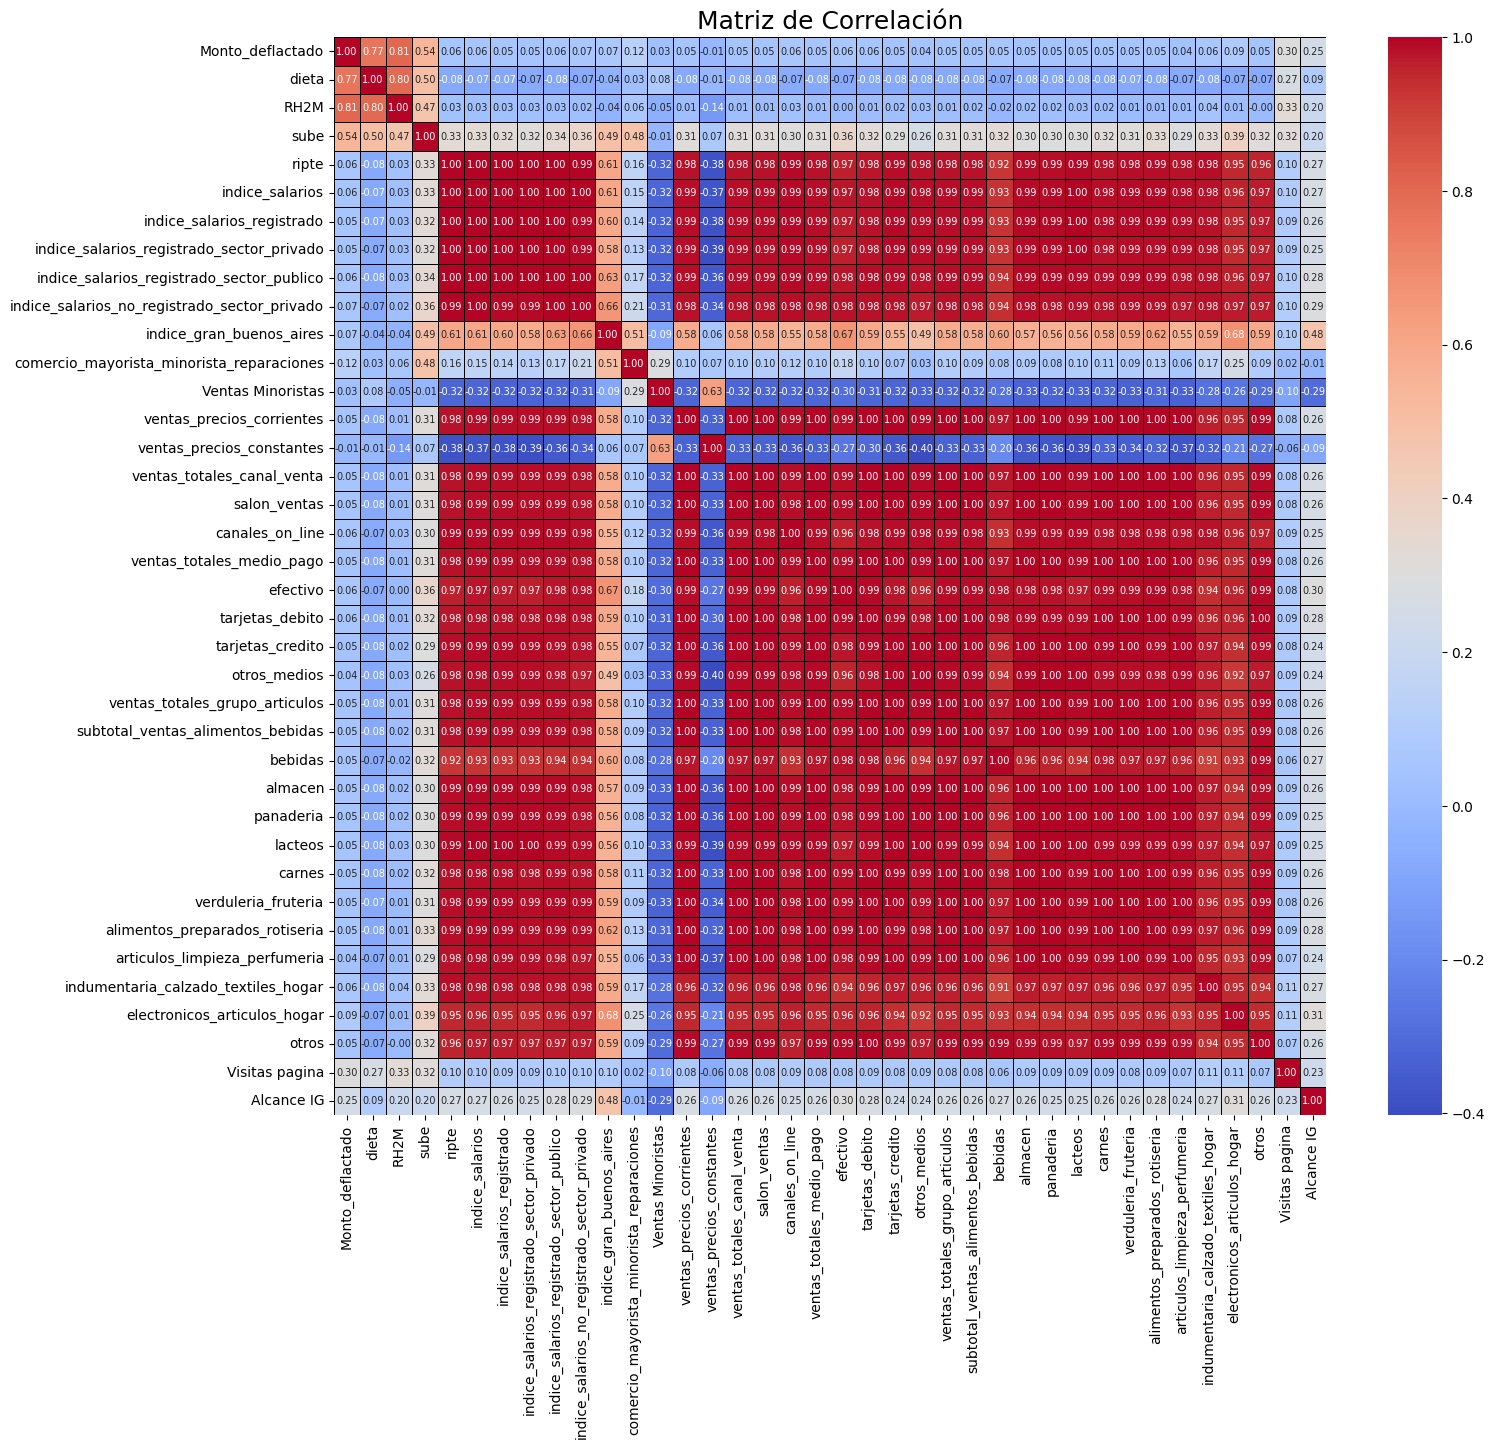

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación excluyendo el índice
correlation_matrix = df_vitalcer_daily.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 7}, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación', size=18)
plt.xticks(rotation=90, size=10)
plt.yticks(rotation=0, size=10)
plt.show()

In [ ]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
df_vitalcer_daily['fecha'] = pd.to_datetime(df_vitalcer_daily['fecha'])

# Establecer 'fecha' como índice
df_vitalcer_daily.set_index('fecha', inplace=True)

In [ ]:
# Llenar los valores nulos en el DataFrame
df_vitalcer_daily.fillna(0, inplace=True)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Realizar pruebas de causalidad de Granger
# Ajusta el número de rezagos según sea necesario
max_lags = 5
for column in df_vitalcer_daily.columns:
    if column != 'Monto_deflactado':
        data = df_vitalcer_daily[['Monto_deflactado', column]]
        print(f'Prueba de causalidad de Granger entre facturacion y {column}:')
        grangercausalitytests(data, max_lags, verbose=True)
        print('\n')


Prueba de causalidad de Granger entre facturacion y dieta:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0923  , p=0.0788  , df_denom=1688, df_num=1
ssr based chi2 test:   chi2=3.0978  , p=0.0784  , df=1
likelihood ratio test: chi2=3.0950  , p=0.0785  , df=1
parameter F test:         F=3.0923  , p=0.0788  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0244  , p=0.0489  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=6.0668  , p=0.0482  , df=2
likelihood ratio test: chi2=6.0559  , p=0.0484  , df=2
parameter F test:         F=3.0244  , p=0.0489  , df_denom=1685, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7683  , p=0.0404  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=8.3395  , p=0.0395  , df=3
likelihood ratio test: chi2=8.3189  , p=0.0399  , df=3
parameter F test:         F=2.7683  , p=0.0404  , df_denom=1682, df_num=3

Granger Causality
number of 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=2.4299  , p=0.0332  , df_denom=1676, df_num=5
ssr based chi2 test:   chi2=12.2292 , p=0.0318  , df=5
likelihood ratio test: chi2=12.1851 , p=0.0323  , df=5
parameter F test:         F=2.4299  , p=0.0332  , df_denom=1676, df_num=5


Prueba de causalidad de Granger entre facturacion y indice_salarios:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3142  , p=0.0213  , df_denom=1688, df_num=1
ssr based chi2 test:   chi2=5.3236  , p=0.0210  , df=1
likelihood ratio test: chi2=5.3152  , p=0.0211  , df=1
parameter F test:         F=5.3142  , p=0.0213  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1404  , p=0.0435  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=6.2995  , p=0.0429  , df=2
likelihood ratio test: chi2=6.2878  , p=0.0431  , df=2
parameter F test:         F=3.1404  , p=0.0435  , df_denom=1685, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=2.7259  , p=0.0280  , df_denom=1679, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.6949  , p=0.0196  , df_denom=1676, df_num=5
ssr based chi2 test:   chi2=13.5630 , p=0.0186  , df=5
likelihood ratio test: chi2=13.5087 , p=0.0191  , df=5
parameter F test:         F=2.6949  , p=0.0196  , df_denom=1676, df_num=5


Prueba de causalidad de Granger entre facturacion y indice_salarios_no_registrado_sector_privado:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1268  , p=0.0077  , df_denom=1688, df_num=1
ssr based chi2 test:   chi2=7.1395  , p=0.0075  , df=1
likelihood ratio test: chi2=7.1245  , p=0.0076  , df=1
parameter F test:         F=7.1268  , p=0.0077  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3574  , p=0.0130  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=8.7407  , p=0.0126  , df=2
likelihood ratio test: chi2=8.7181  , p=0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(




Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5071  , p=0.0574  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=7.5526  , p=0.0562  , df=3
likelihood ratio test: chi2=7.5358  , p=0.0566  , df=3
parameter F test:         F=2.5071  , p=0.0574  , df_denom=1682, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9510  , p=0.0192  , df_denom=1679, df_num=4
ssr based chi2 test:   chi2=11.8671 , p=0.0184  , df=4
likelihood ratio test: chi2=11.8256 , p=0.0187  , df=4
parameter F test:         F=2.9510  , p=0.0192  , df_denom=1679, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.5629  , p=0.0256  , df_denom=1676, df_num=5
ssr based chi2 test:   chi2=12.8987 , p=0.0243  , df=5
likelihood ratio test: chi2=12.8496 , p=0.0248  , df=5
parameter F test:         F=2.5629  , p=0.0256  , df_denom=1676, df_num=5


Prueba de causalidad de Granger entre facturacion y ventas_precios_corrientes:

Grang

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=4.2095  , p=0.0404  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0927  , p=0.0062  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=10.2156 , p=0.0060  , df=2
likelihood ratio test: chi2=10.1849 , p=0.0061  , df=2
parameter F test:         F=5.0927  , p=0.0062  , df_denom=1685, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.5311  , p=0.0009  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=16.6623 , p=0.0008  , df=3
likelihood ratio test: chi2=16.5807 , p=0.0009  , df=3
parameter F test:         F=5.5311  , p=0.0009  , df_denom=1682, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8204  , p=0.0007  , df_denom=1679, df_num=4
ssr based chi2 test:   chi2=19.3850 , p=0.0007  , df=4
likelihood ratio test: chi2=19.2745 , p=0.0007  , df=4
parameter F test:         F=4.8204  , p=0.0007  , df_denom=1679, df_num=4

Granger Causa

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



parameter F test:         F=5.2025  , p=0.0001  , df_denom=1676, df_num=5


Prueba de causalidad de Granger entre facturacion y tarjetas_debito:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0725  , p=0.0244  , df_denom=1688, df_num=1
ssr based chi2 test:   chi2=5.0815  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0739  , p=0.0243  , df=1
parameter F test:         F=5.0725  , p=0.0244  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9558  , p=0.0026  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=11.9469 , p=0.0025  , df=2
likelihood ratio test: chi2=11.9049 , p=0.0026  , df=2
parameter F test:         F=5.9558  , p=0.0026  , df_denom=1685, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1706  , p=0.0004  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=18.5888 , p=0.0003  , df=3
likelihood ratio test: chi2=18.4872 , p=0.0003  , df=3
parameter F test

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=5.4907  , p=0.0009  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=16.5408 , p=0.0009  , df=3
likelihood ratio test: chi2=16.4603 , p=0.0009  , df=3
parameter F test:         F=5.4907  , p=0.0009  , df_denom=1682, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8064  , p=0.0007  , df_denom=1679, df_num=4
ssr based chi2 test:   chi2=19.3285 , p=0.0007  , df=4
likelihood ratio test: chi2=19.2187 , p=0.0007  , df=4
parameter F test:         F=4.8064  , p=0.0007  , df_denom=1679, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.3693  , p=0.0006  , df_denom=1676, df_num=5
ssr based chi2 test:   chi2=21.9898 , p=0.0005  , df=5
likelihood ratio test: chi2=21.8477 , p=0.0006  , df=5
parameter F test:         F=4.3693  , p=0.0006  , df_denom=1676, df_num=5


Prueba de causalidad de Granger entre facturacion y subtotal_ventas_alimentos_bebidas:

Granger Causality
number of lags (no zero) 1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=3.5985  , p=0.0580  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4879  , p=0.0308  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=6.9965  , p=0.0303  , df=2
likelihood ratio test: chi2=6.9821  , p=0.0305  , df=2
parameter F test:         F=3.4879  , p=0.0308  , df_denom=1685, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5239  , p=0.0036  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=13.6282 , p=0.0035  , df=3
likelihood ratio test: chi2=13.5735 , p=0.0035  , df=3
parameter F test:         F=4.5239  , p=0.0036  , df_denom=1682, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7612  , p=0.0047  , df_denom=1679, df_num=4
ssr based chi2 test:   chi2=15.1254 , p=0.0044  , df=4
likelihood ratio test: chi2=15.0580 , p=0.0046  , df=4
parameter F test:         F=3.7612  , p=0.0047  , df_denom=1679, df_num=4

Granger Causa

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=8.2818  , p=0.0000  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=24.9487 , p=0.0000  , df=3
likelihood ratio test: chi2=24.7662 , p=0.0000  , df=3
parameter F test:         F=8.2818  , p=0.0000  , df_denom=1682, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.3324  , p=0.0000  , df_denom=1679, df_num=4
ssr based chi2 test:   chi2=29.4868 , p=0.0000  , df=4
likelihood ratio test: chi2=29.2322 , p=0.0000  , df=4
parameter F test:         F=7.3324  , p=0.0000  , df_denom=1679, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=6.5338  , p=0.0000  , df_denom=1676, df_num=5
ssr based chi2 test:   chi2=32.8833 , p=0.0000  , df=5
likelihood ratio test: chi2=32.5669 , p=0.0000  , df=5
parameter F test:         F=6.5338  , p=0.0000  , df_denom=1676, df_num=5


Prueba de causalidad de Granger entre facturacion y alimentos_preparados_rotiseria:

Granger Causality
number of lags (no zero) 1
ss

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=12.6647 , p=0.0004  , df_denom=1688, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.3199  , p=0.0003  , df_denom=1685, df_num=2
ssr based chi2 test:   chi2=16.6892 , p=0.0002  , df=2
likelihood ratio test: chi2=16.6073 , p=0.0002  , df=2
parameter F test:         F=8.3199  , p=0.0003  , df_denom=1685, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7343  , p=0.0002  , df_denom=1682, df_num=3
ssr based chi2 test:   chi2=20.2870 , p=0.0001  , df=3
likelihood ratio test: chi2=20.1661 , p=0.0002  , df=3
parameter F test:         F=6.7343  , p=0.0002  , df_denom=1682, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.4676  , p=0.0000  , df_denom=1679, df_num=4
ssr based chi2 test:   chi2=26.0089 , p=0.0000  , df=4
likelihood ratio test: chi2=25.8105 , p=0.0000  , df=4
parameter F test:         F=6.4676  , p=0.0000  , df_denom=1679, df_num=4

Granger Causa

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
